In [77]:
import yfinance as yf
import pandas as pd
import pandas_ta as ta
import matplotlib.pyplot as plt

In [78]:
# Download data

In [79]:
data = yf.download("HDFCBANK.NS", start="2023-01-01", end="2024-01-01")
data.columns = [col[0] for col in data.columns] 
data.dropna(inplace=True)

[*********************100%***********************]  1 of 1 completed


In [80]:
# RSI

In [81]:
data["RSI_14"] = ta.rsi(data["Close"], length=14)

In [82]:
#MACD

In [83]:
macd = ta.macd(data["Close"])
if macd is not None:
    data = pd.concat([data, macd], axis=1)

In [89]:
# print(data.columns)

In [85]:
# Plot RSI

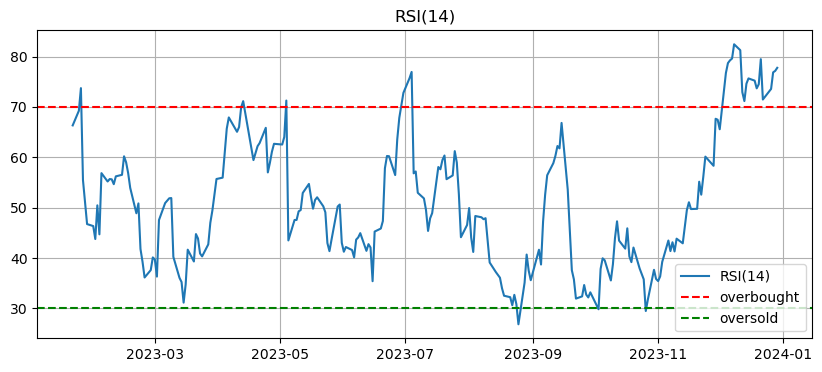

In [86]:
plt.figure(figsize=(10, 4))
plt.plot(data["RSI_14"], label="RSI(14)")
plt.axhline(70, color="red", linestyle="--",label='overbought')
plt.axhline(30, color="green", linestyle="--",label='oversold')
plt.title("RSI(14)")
plt.legend()
plt.grid()
plt.show()

In [87]:
# Plot MACD


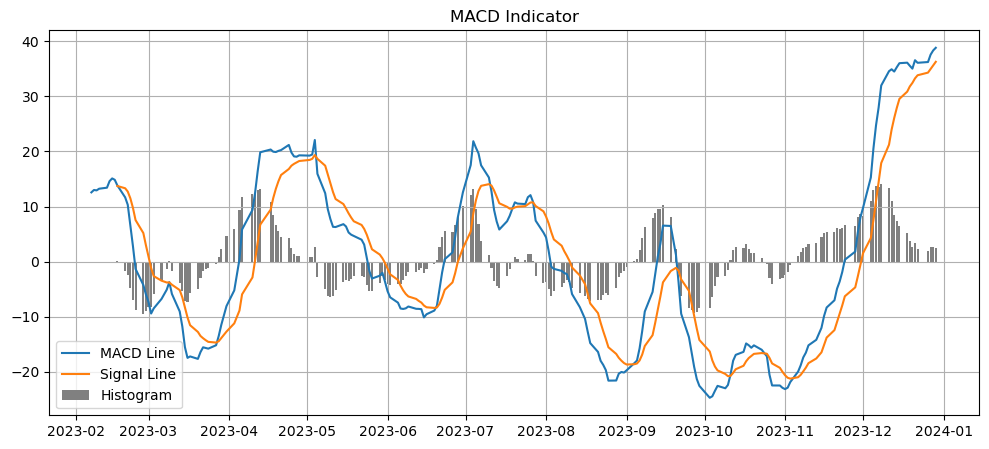

In [88]:
plt.figure(figsize=(12, 5))
plt.plot(data["MACD_12_26_9"], label="MACD Line")
plt.plot(data["MACDs_12_26_9"], label="Signal Line")
plt.bar(data.index, data["MACDh_12_26_9"], label="Histogram", color="gray")
plt.title("MACD Indicator")
plt.legend()
plt.grid()
plt.show()
